In [14]:
# import packages
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt

In [20]:
# load dataset
chocolate = pd.read_csv('data/chocolate.csv')
chocolate

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00
1,701,Haigh,Australia,2011,Blend,South America and Africa,70%,NaN,"vanilla, chocolate milk",3.00
2,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75
3,296,Hotel Chocolat (Coppeneur),U.K.,2008,Uganda,Uganda,80%,NaN,"charred, espresso",2.50
4,552,Hotel Chocolat (Coppeneur),U.K.,2010,Ecuador,Ecuador,70%,NaN,"spicy, sour, burning",2.75
...,...,...,...,...,...,...,...,...,...,...
1555,336,Bonnat,France,2009,Peru,"Porcelana, Apotequil",75%,"3- B,S,C","flat, bread, earthy",2.75
1556,331,Bonnat,France,2009,Ivory Coast,Ivory Coast,75%,"3- B,S,C","oily, intense cocoa, sl. Burnt",3.00
1557,336,Bonnat,France,2009,Mexico,"Porcelana, Tabasco, Marfil de Blanco",75%,"3- B,S,C","mild bitter, nut, possible mold",3.00
1558,395,Bonnat,France,2009,Mexico,"Xoconusco, cacao Real",75%,"3- B,S,C","fatty, roasty, earthy",3.00


### Analyzing the Difference of Cocoa Percent between Different Companies

First, since the 'cocoa percent' column included in the original dataset is not numeric data and include % for each data, we store the data in the 'cocoa percent' column into a list of numeric data by removing the % and convert the data into float number.

In [3]:
# Store the data in the 'cocoa percent' column in a list as numeric data
cocoa_percent_lst = []
for i in chocolate["Cocoa Percent"].tolist():
    cocoa_percent_lst.append(float(re.sub('%', '', i)))
#cocoa_percent_lst

Then, to analyze and compare the cocoa percent in different chocolate bars produced by different companies, we calculate the average, median, maximum, and minimum cocoa percent in chocolate bars of each company and store the data into a new dataframe.

In [4]:
# Calculate the mean, median, maximum, and minimum cocoa percent of each company
chocolate['mean cocoa percent'] = cocoa_percent_lst
chocolate['median cocoa percent'] = cocoa_percent_lst
chocolate['max cocoa percent'] = cocoa_percent_lst
chocolate['min cocoa percent'] = cocoa_percent_lst
company_cocoa_percent = chocolate.groupby('Company (Manufacturer)').agg({'mean cocoa percent':'mean', 'median cocoa percent':'median',
                                                                        'max cocoa percent':'max', 'min cocoa percent':'min'})
company_cocoa_percent

,mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
Company (Manufacturer),,,,
5150,74.000000,76.0,76.0,68.0
A. Morin,63.000000,63.0,63.0,63.0
Acalli,71.000000,70.0,74.0,70.0
Aelan,70.000000,70.0,70.0,70.0
Amatller (Simon Coll),77.500000,77.5,85.0,70.0
...,...,...,...,...
hello cocoa (now Markham & Fitz),65.500000,65.5,74.0,57.0
hexx,71.500000,70.5,74.0,70.0
organicfair,72.166667,72.0,74.0,71.0


To better visualize the table, we sort the table by the average cocoa percent column and store the table as csv file.

In [5]:
company_cocoa_percent = company_cocoa_percent.sort_values(by=['mean cocoa percent'], ascending=False)
company_cocoa_percent

,mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
Company (Manufacturer),,,,
Pacari,100.0,100.0,100.0,100.0
Coppeneur,100.0,100.0,100.0,100.0
TCHO,99.0,99.0,99.0,99.0
Bouga Cacao (Tulicorp),88.5,88.5,100.0,77.0
Pralus,87.5,87.5,100.0,75.0
...,...,...,...,...
Machu Picchu Trading Co.,62.5,62.5,70.0,55.0
Two Ravens,60.0,60.0,60.0,60.0
La Pepa de Oro,60.0,60.0,60.0,60.0


From the table above, we can clearly see that there is a difference in the cocoa percent of the dark chocolate bars produced by different companies, and the range of cocoa percent is from 60% to 100%.

In [ ]:
company_cocoa_percent.to_csv('tables/company_cocoa_percent.csv')

### Analyze if the Average Cocoa Percent of Different Chocolate Bars has changed Over Times

Below, we used the same computation trick from above to analyze the change in cocoa percent in different chocolate bars produced over years, and we also calculated the average, median, maximum, and minimum cocoa percent each year to help our analysis.

In [6]:
year_cocoa_percent = chocolate.groupby('Review Date').agg({'mean cocoa percent':'mean', 'median cocoa percent':'median',
                                                                        'max cocoa percent':'max', 'min cocoa percent':'min'})
year_cocoa_percent.to_csv('tables/year_cocoa_percent.csv')
year_cocoa_percent

,mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
Review Date,,,,
2006,75.454545,75.0,100.0,70.0
2007,73.913043,70.0,100.0,60.0
2008,75.392857,70.5,100.0,60.0
2009,72.854545,72.0,100.0,64.0
2010,72.330000,72.0,100.0,55.0
2011,71.369565,70.0,88.0,60.0
2012,71.955752,70.0,100.0,60.0
2013,74.378947,72.0,100.0,55.0
2014,72.801948,72.0,100.0,60.0


To better visualize the table, we create a line plot below with four lines, each representing the mean, median, max, and min cocoa percent of that particular year and store the figure as png file.

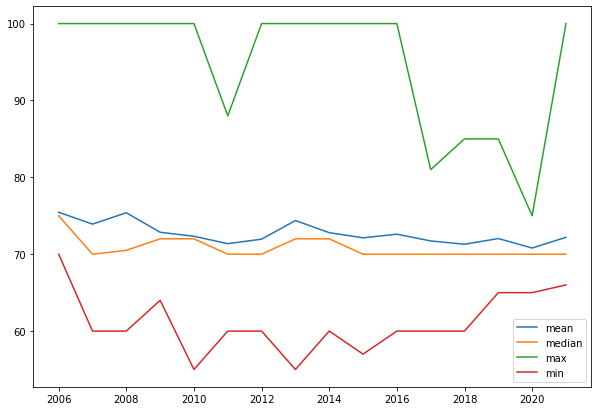

In [12]:
year = year_cocoa_percent.index.tolist()
mean = year_cocoa_percent['mean cocoa percent'].tolist()
median = year_cocoa_percent['median cocoa percent'].tolist()
max_percent = year_cocoa_percent['max cocoa percent'].tolist()
min_percent = year_cocoa_percent['min cocoa percent'].tolist()
# plot lines
plt.figure(figsize =(10, 7))
plt.plot(year, mean, label = "mean")
plt.plot(year, median, label = "median")
plt.plot(year, max_percent, label = "max")
plt.plot(year, min_percent, label = "min")
plt.legend()
plt.savefig('figures/cocoa_percent_change_over_years.png')